In [1]:
using Distributions
using Test
using Plots, Colors

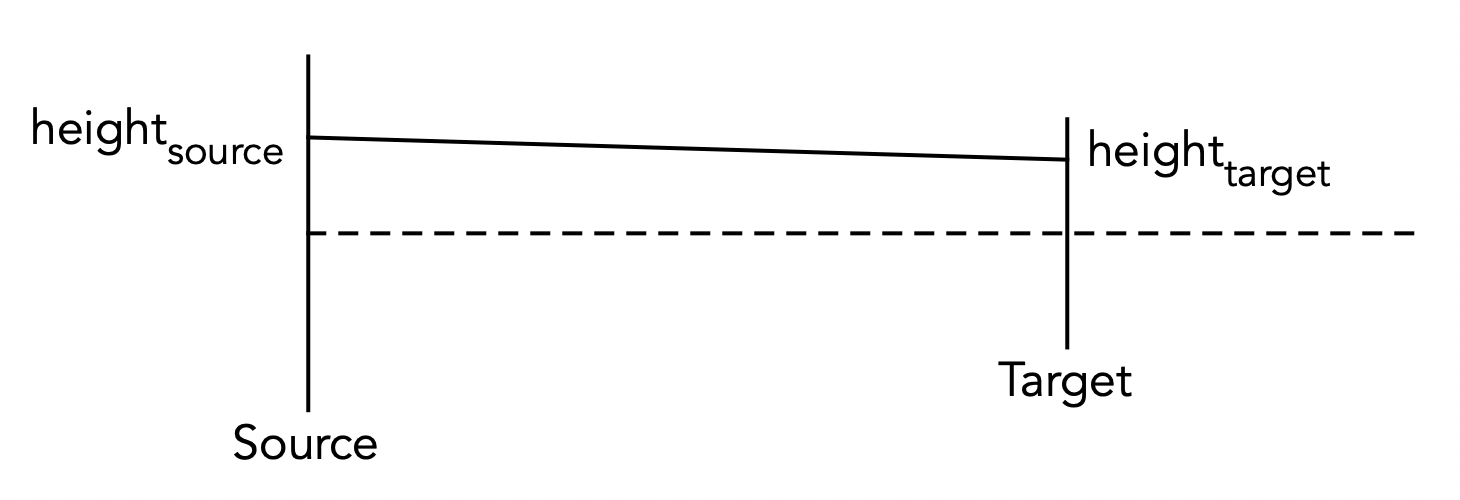

In [2]:
N_target = 100
N_scene = 500

# Units meter
øtarget = .5e9
øscene = 500
Dist = BigFloat(2.8e16) # 3 Lyr
wavelength = 500e-9



""" Given an integer into the number of emissions points, returns the height in units of ø.

# Arguments
- `i::Integer`: Index into the number of emitters
- `ø::Float`: Diameter of object
- `N::Integer`: Number of emission points
"""
function height_into(i, ø, N)
    
    mid_i = N/2 
    d_i = i-1-mid_i

    fractional_height = d_i / N * ø
    
end

function height_target(i)
    height_into(i, øtarget, N_target)
end

function height_scene(i)
    height_into(i, øscene, N_scene)
end

@test height_target(N_target/2+1) == 0
@test height_target(1) == -øtarget/2
@test height_scene(1) == -øscene/2


println(height_target(1))
println(height_scene(1))

println("Target has an angular diameter of ", Float64(øtarget/Dist))

-2.5e8
-250.0
Target has an angular diameter of 1.7857142857142856e-8


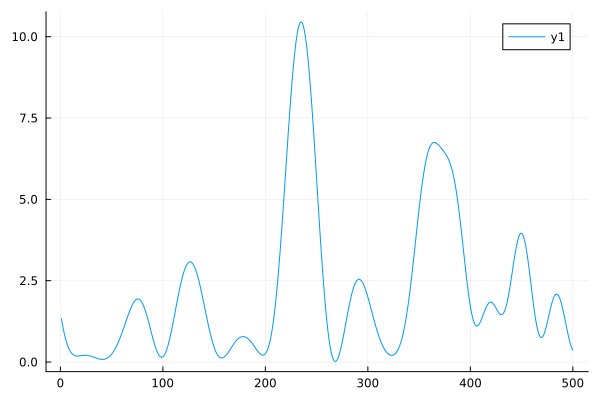

In [37]:
results = zeros(ComplexF64,N_target,N_scene)
#ϕ_targ = rand(Normal(0,2π), N_target);
ϕ_targ = rand(Uniform(0,2π), N_target);
Flux = 1e8 # photon / m^2 / s^2
Dₜₑₗ = 1
Aₜₑₗ = π * (Dₜₑₗ/2)^2
tₑₓₚ = 1e-6

Flux_per_Scene = Flux * Aₜₑₗ * tₑₓₚ / N_scene

for is in 1:N_scene # These are the emitters
    for it in 1:N_target # These are the target
        dh = height_target(it) - height_scene(is) 
        path_length = sqrt(dh^2 + Dist^2) 
        total_phase = path_length / wavelength
        n_waves = Float64(total_phase - round(total_phase))

        results[it,is] = Flux_per_Scene * exp(1im * (2π * n_waves + ϕ_targ[it]))
    end
end

plot(transpose(abs.(sum(results, dims=1))).^2)
#plot(abs.(sum(results, dims=2)).^2, layout=1, yscale=:log)